In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/F_SUBAVG_AGE")
except:
    print("F_SUBAVG_AGE dir exists.")

    7
swivel = 0

#F ORDER
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]
swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 13, 19, 11, 18, 21, 17]

# NF ORDER
#swivel_order = [22, 2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]
#swivel_order = [2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]

desired_dir_name = "F_SUBAVG_AGE"
desired_file_prefix = "F_AGE" 

normalize_data=True

by_year = 1
lnconvert=False
 

F_SUBAVG_AGE dir exists.


# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        
        desired_file_output = "./" + desired_dir_name + "/" + desired_file_prefix + "_" + str(2011+year) + "_"     
        
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
F_AGE_AGX_45to54_all.csv
F_AGE_AHX_55to64_all.csv
F_AGE_AAX_under16_all.csv
F_AGE_ABX_16to17_all.csv
F_AGE_AFX_35to44_all.csv
F_AGE_AEX_25to34_all.csv
F_AGE_ACX_18to19_all.csv
F_AGE_ADX_20to24_all.csv
F_AGE_AIX_65plus_all.csv
dict_keys(['F_AGE_AGX_45to54', 'F_AGE_AHX_55to64', 'F_AGE_AAX_under16', 'F_AGE_ABX_16to17', 'F_AGE_AFX_35to44', 'F_AGE_AEX_25to34', 'F_AGE_ACX_18to19', 'F_AGE_ADX_20to24', 'F_AGE_AIX_65plus'])
code_found: 11-0000:Management Occupations
*gt(adding): F_AGE_AGX_45to54_112021
F_AGE_AGX_45to54
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
*gt(adding): F_AGE_AGX_45to54_113011
F_AGE_AGX_45to54
########## NEED TO EVAL ##################
########## NEED TO EV

In [8]:
#for i in range(0,200):      #len(global_y_soc1)):
#    print(global_y_soc1[i])

# SAMPLE STRUCTURE

In [9]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_F_AGE_AGX_45to54_111011-Management Occupations', [4.927996495646936e-07, 1.642665498548979e-07]]
['2011_F_AGE_AGX_45to54_112021-Management Occupations', [0, 0, 0, 0]]
['2011_F_AGE_AGX_45to54_113011-Management Occupations', [1.0951103323659858e-07]]
['2011_F_AGE_AGX_45to54_113121-Management Occupations', [0, 0, 0, 0]]
['2011_F_AGE_AGX_45to54_119013-Management Occupations', [2.1354651481136726e-06, 3.285330997097958e-07, 1.0951103323659858e-07, 5.475551661829929e-08, 2.7377758309149647e-07]]
['2011_F_AGE_AGX_45to54_119111-Management Occupations', [2.7377758309149647e-07]]
['2011_F_AGE_AHX_55to64_111011-Management Occupations', [2.1902206647319717e-07]]
['2011_F_AGE_AHX_55to64_112021-Management Occupations', [1.642665498548979e-07]]
['2011_F_AGE_AHX_55to64_113011-Management Occupations', [0, 0, 0, 0]]
['2011_F_AGE_AHX_55to64_113131-Management Occupations', [0, 0, 0, 0]]


In [10]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0, 0, 0, 0]]


In [11]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [12]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['F', 'AGE']
F_AGE


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_110000_Management_Occupations_time_plots_.png


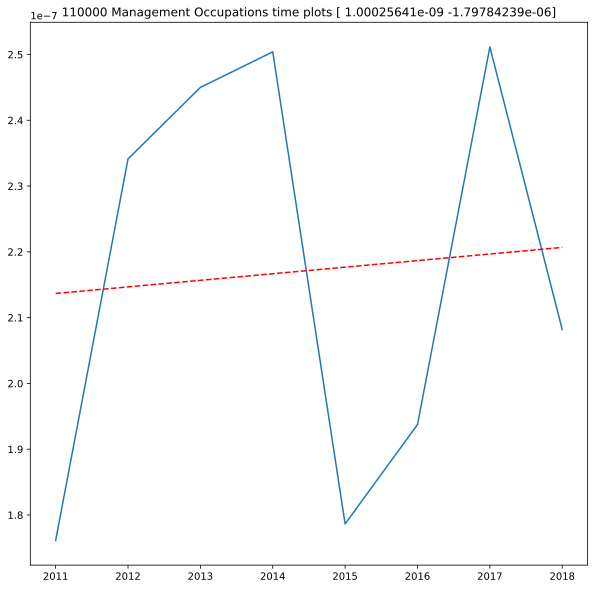

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


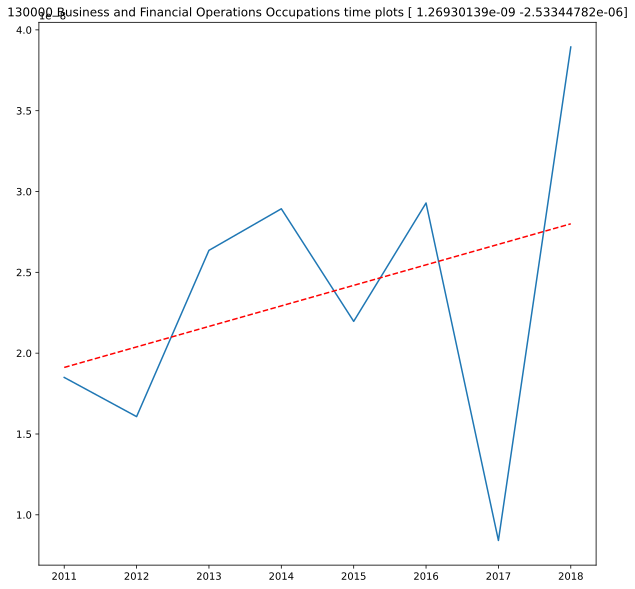

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


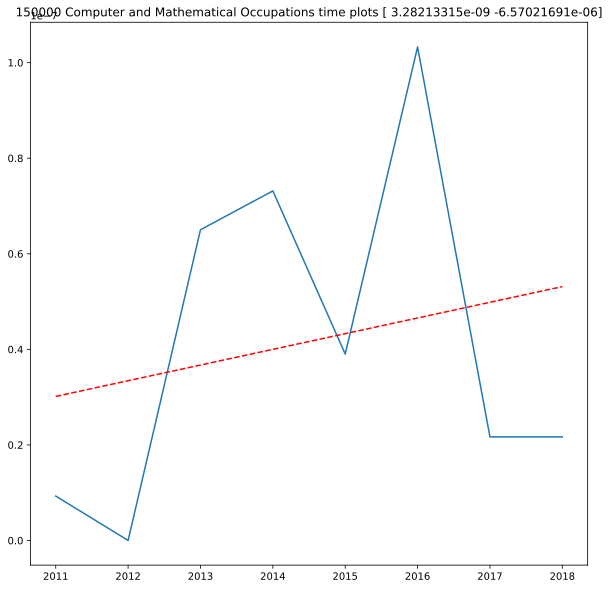

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


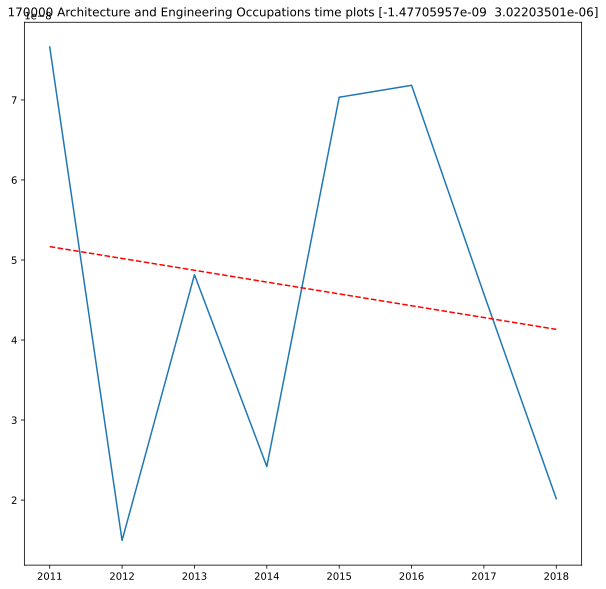

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


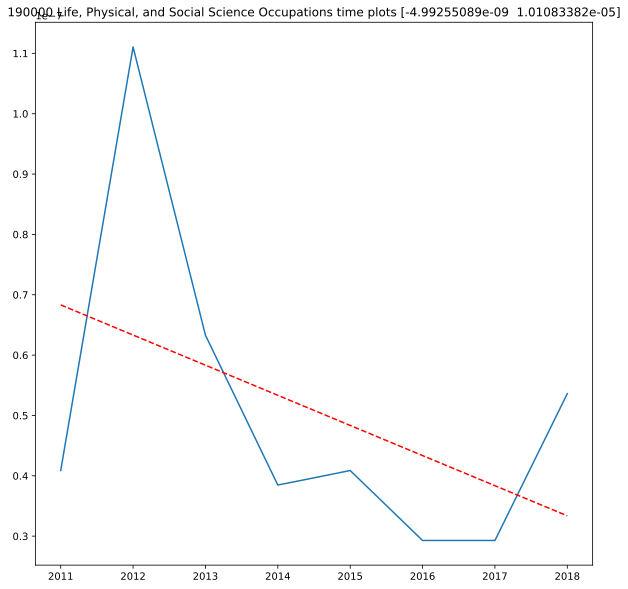

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


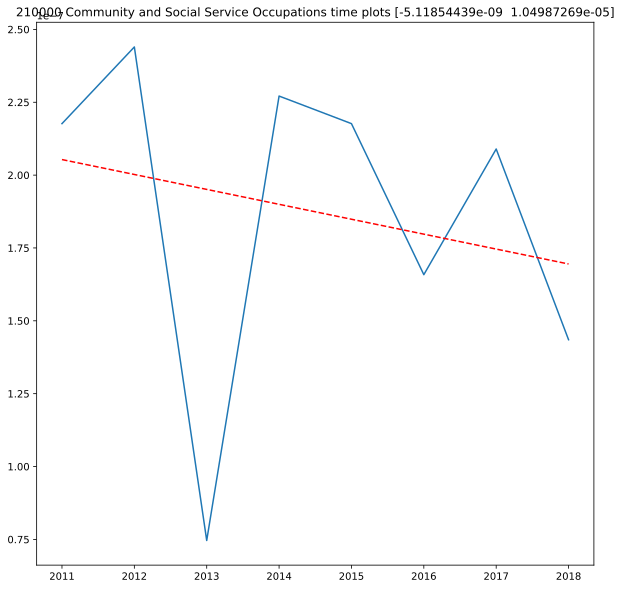

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_230000_Legal_Occupations_time_plots_.png


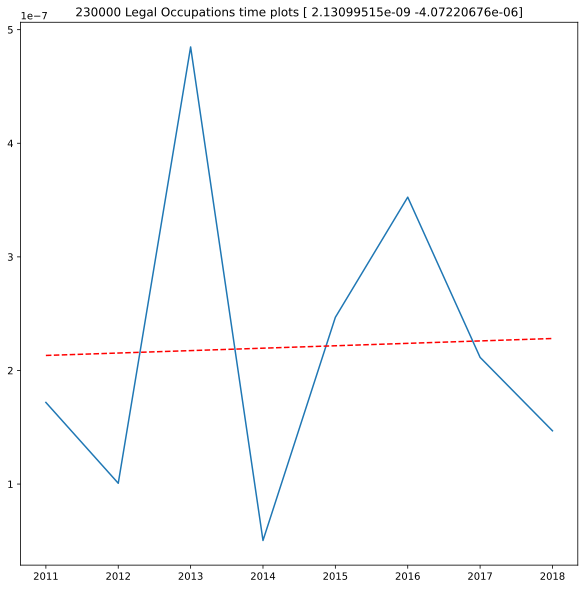

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


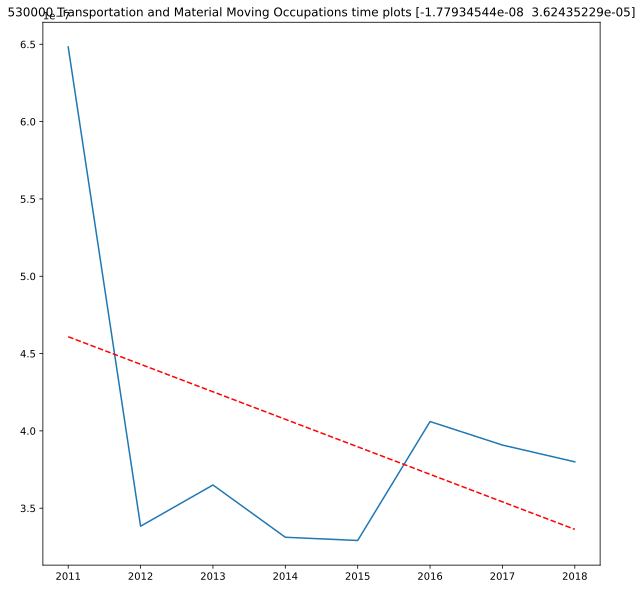

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


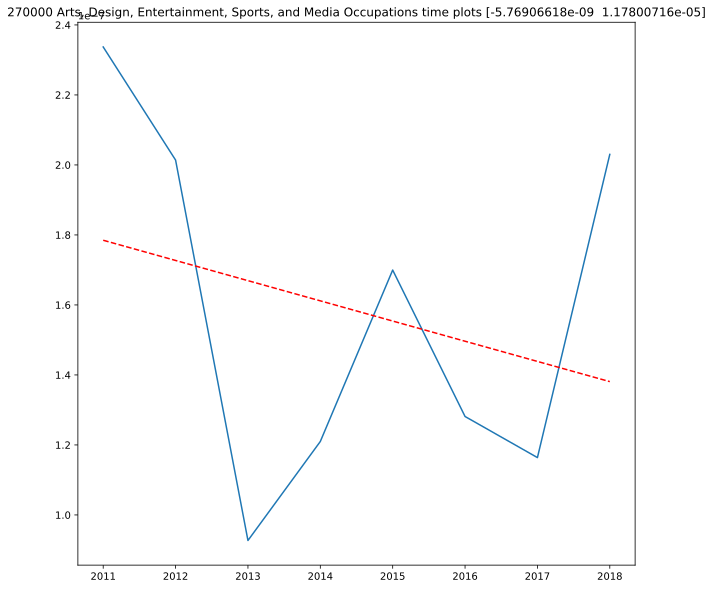

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


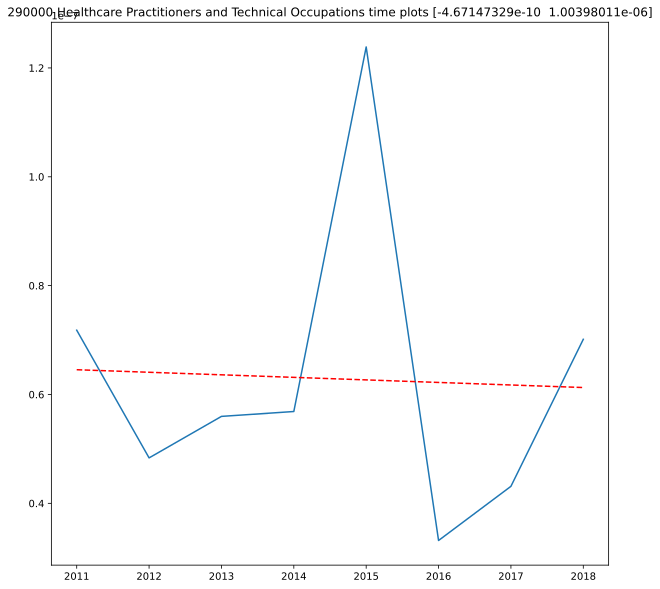

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_310000_Healthcare_Support_Occupations_time_plots_.png


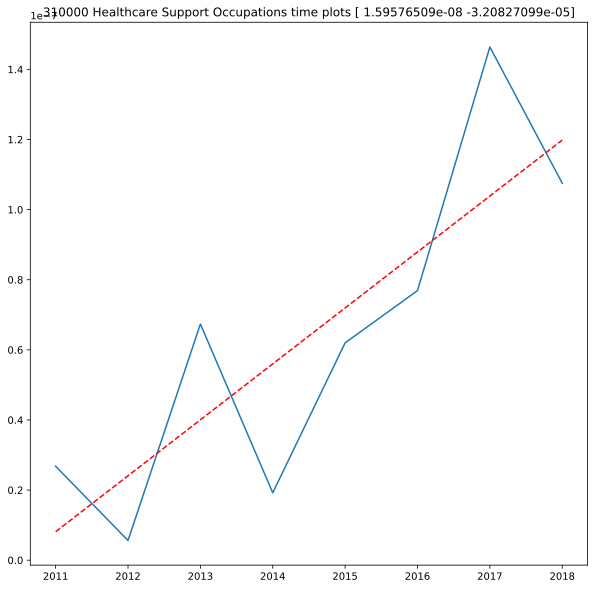

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_330000_Protective_Service_Occupations_time_plots_.png


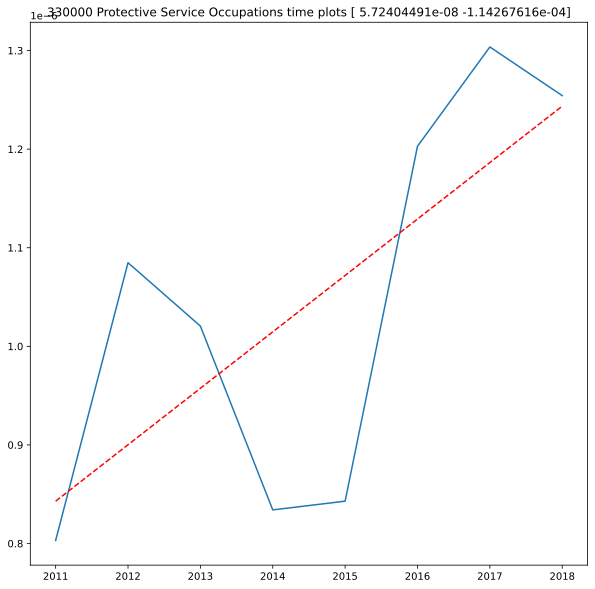

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


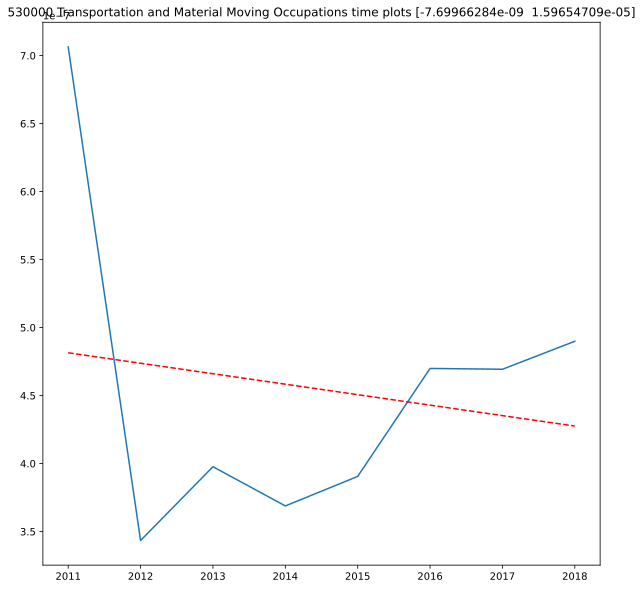

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


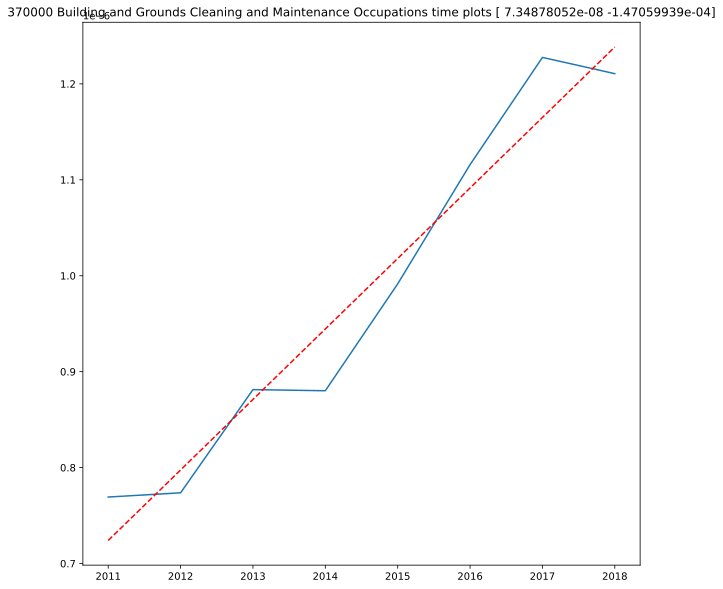

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


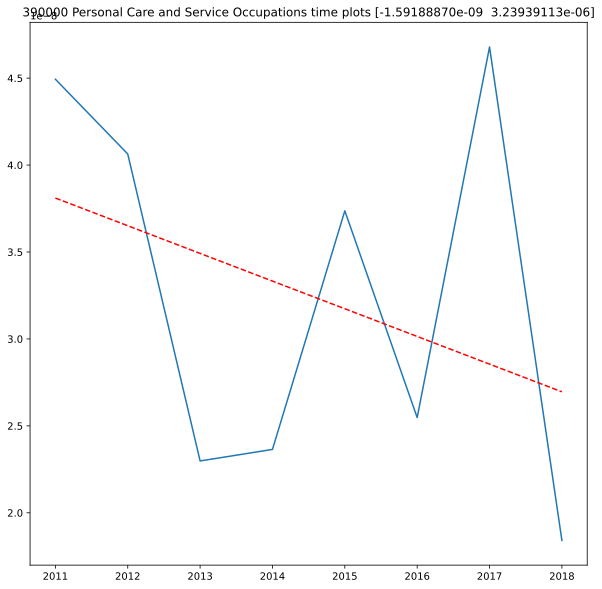

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_410000_Sales_and_Related_Occupations_time_plots_.png


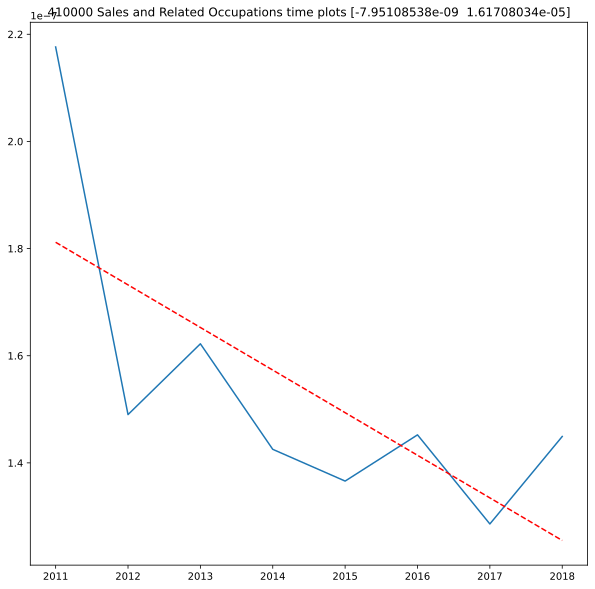

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


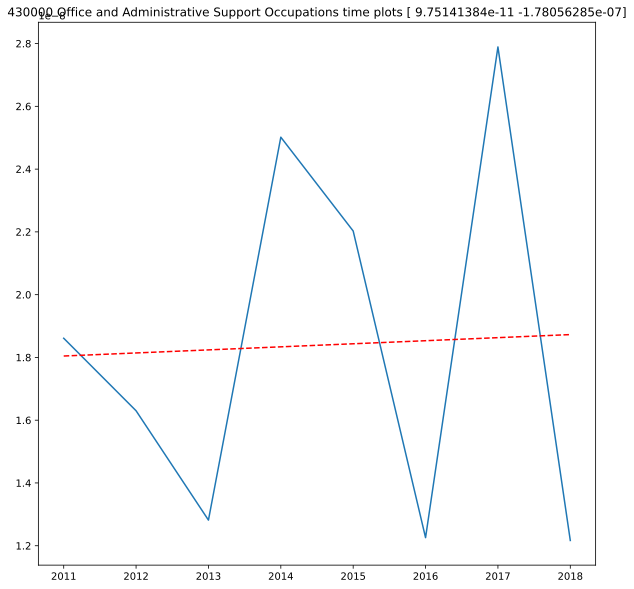

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


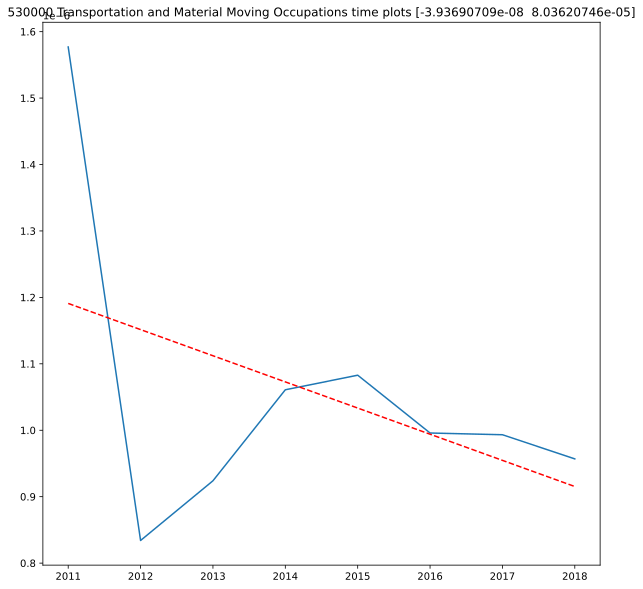

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


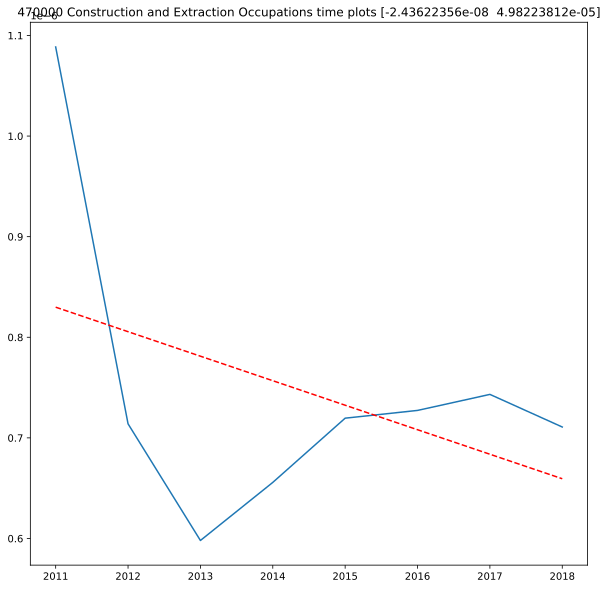

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


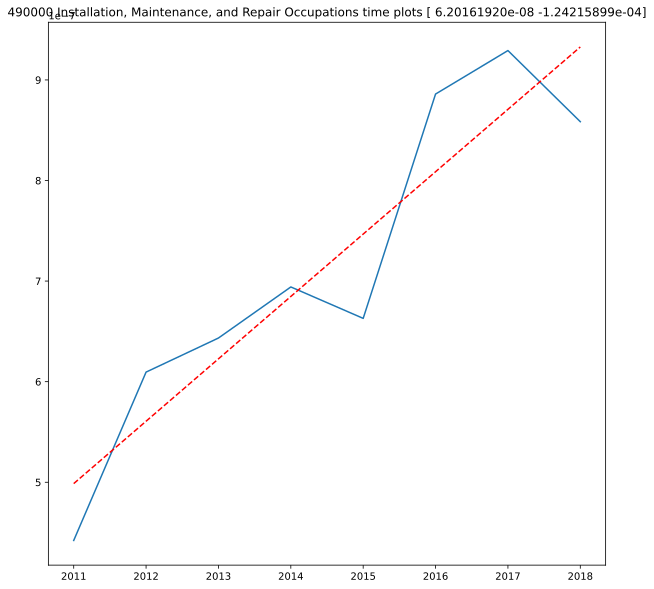

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_510000_Production_Occupations_time_plots_.png


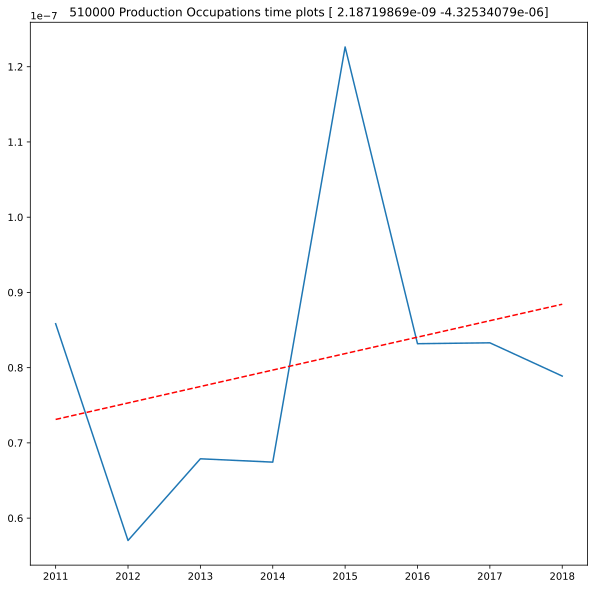

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


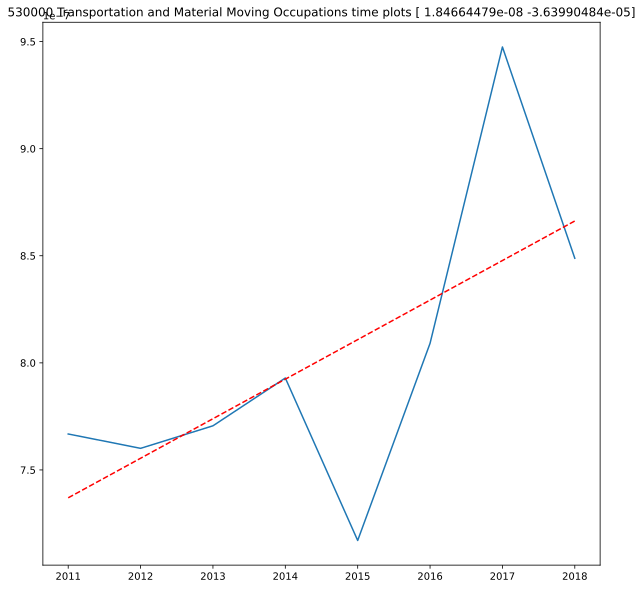

In [13]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

#code_list =  ['_11', '_13' ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        
        if (len(tmp_lst) == 0):
            omean = 0.0
        else:
            omean = np.array(tmp_lst).mean()

        #print(year,occupation,omean)
        #print(" ")
 
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
 
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()


In [14]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y =  0.00000000 x + -0.00000180  : 110000 Management Occupations 
 y =  0.00000000 x + -0.00000253  : 130000 Business and Financial Operations Occupations 
 y =  0.00000000 x + -0.00000657  : 150000 Computer and Mathematical Occupations 
 y = -0.00000000 x +  0.00000302  : 170000 Architecture and Engineering Occupations 
 y = -0.00000000 x +  0.00001011  : 190000 Life, Physical, and Social Science Occupations 
 y = -0.00000001 x +  0.00001050  : 210000 Community and Social Service Occupations 
 y =  0.00000000 x + -0.00000407  : 230000 Legal Occupations 
 y = -0.00000002 x +  0.00003624  : 530000 Transportation and Material Moving Occupations 
 y = -0.00000001 x +  0.00001178  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00000000 x +  0.00000100  : 290000 Healthcare Practitioners and Technical Occupations 
 y =  0.00000002 x + -0.00003208  : 310000 Healthcare Support Occupations 
 y =  0.00000006 x + -0.00011427  : 330000 Protective Service Occupations 

# CALC COV 

In [15]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)

print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [16]:
# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

for i in range(0,len(code_list)):
       
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0

        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        

    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    
    if (math.isnan(omean)):
        ocov = 0.0
    else:
        ostd  = np.array(y).std()
        ocov  = ostd/omean
        
    #ocov.append(str(use_case),ocov)
    print("***",use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])
    else:
        print("########ERROR#######")
       

*** 110000 Management Occupations 0.11682914436330401
*** 130000 Business and Financial Operations Occupations 0.36286620401386244
*** 150000 Computer and Mathematical Occupations 0.8020933261332851
*** 170000 Architecture and Engineering Occupations 0.47248052708320026
*** 190000 Life, Physical, and Social Science Occupations 0.49512687170777314
*** 210000 Community and Social Service Occupations 0.3543814779256678
*** 230000 Legal Occupations 0.5779335757918269
*** 250000 Educational Instruction and Library Occupations 0.42607309086888595
*** 270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.2584807383986181
*** 290000 Healthcare Practitioners and Technical Occupations 0.5110025127134084
*** 310000 Healthcare Support Occupations 0.6681204134036948
*** 330000 Protective Service Occupations 0.15266718666637985
*** 350000 Food Preparation and Serving Related Occupations 0.6633034014424077
*** 370000 Building and Grounds Cleaning and Maintenance Occupations 0.1533341757

In [17]:
print(cov_array)

[['110000 Management Occupations', 0.11682914436330401], ['130000 Business and Financial Operations Occupations', 0.36286620401386244], ['150000 Computer and Mathematical Occupations', 0.8020933261332851], ['170000 Architecture and Engineering Occupations', 0.47248052708320026], ['190000 Life, Physical, and Social Science Occupations', 0.49512687170777314], ['210000 Community and Social Service Occupations', 0.3543814779256678], ['230000 Legal Occupations', 0.5779335757918269], ['250000 Educational Instruction and Library Occupations', 0.42607309086888595], ['270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.2584807383986181], ['290000 Healthcare Practitioners and Technical Occupations', 0.5110025127134084], ['310000 Healthcare Support Occupations', 0.6681204134036948], ['330000 Protective Service Occupations', 0.15266718666637985], ['350000 Food Preparation and Serving Related Occupations', 0.6633034014424077], ['370000 Building and Grounds Cleaning and Maintenance

In [18]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0732835 	 470000 Construction and Extraction Occupations 
0.0859899 	 530000 Transportation and Material Moving Occupations 
0.0949546 	 450000 Farming, Fishing, and Forestry Occupations 
0.0949810 	 410000 Sales and Related Occupations 
0.1168291 	 110000 Management Occupations 
0.1526672 	 330000 Protective Service Occupations 
0.1533342 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1697749 	 490000 Installation, Maintenance, and Repair Occupations 
0.2274804 	 510000 Production Occupations 
0.2584807 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.3096012 	 430000 Office and Administrative Support Occupations 
0.3543815 	 210000 Community and Social Service Occupations 
0.3628662 	 130000 Business and Financial Operations Occupations 
0.4260731 	 250000 Educational Instruction and Library Occupations 
0.4486145 	 390000 Personal Care and Service Occupations 
0.4724805 	 170000 Architecture and Engineering Occupations 
0.4951269 	 1900

# MEAN

In [19]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 2.2136031096525014e-07
130000 Business and Financial Operations Occupations 2.3868583519548774e-08
150000 Computer and Mathematical Occupations 4.1640323056000916e-08
170000 Architecture and Engineering Occupations 4.410424130851952e-08
190000 Life, Physical, and Social Science Occupations 5.084438322723946e-08
210000 Community and Social Service Occupations 1.7097500929022667e-07
230000 Legal Occupations 2.5208170699973977e-07
250000 Educational Instruction and Library Occupations 1.2555340077635584e-08
270000 Arts, Design, Entertainment, Sports, and Media Occupations 1.323189529555878e-07
290000 Healthcare Practitioners and Technical Occupations 5.7834490278518566e-08
310000 Healthcare Support Occupations 6.502629146869611e-08
330000 Protective Service Occupations 1.086546025258006e-06
350000 Food Prep

In [20]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    
    
    
# create sorted order index list
sorted_order = []
for i in range(0,len(test_list)):
    idx = str(test_list[i][0]).split(" ")[0][0:2]
    nidx = int( (int(idx) - 11) / 2 )
    sorted_order.append(nidx)
    
print(sorted_order)

0.0000000 	 250000 Educational Instruction and Library Occupations 
0.0000000 	 430000 Office and Administrative Support Occupations 
0.0000000 	 130000 Business and Financial Operations Occupations 
0.0000000 	 390000 Personal Care and Service Occupations 
0.0000000 	 150000 Computer and Mathematical Occupations 
0.0000000 	 170000 Architecture and Engineering Occupations 
0.0000001 	 190000 Life, Physical, and Social Science Occupations 
0.0000001 	 290000 Healthcare Practitioners and Technical Occupations 
0.0000001 	 310000 Healthcare Support Occupations 
0.0000001 	 350000 Food Preparation and Serving Related Occupations 
0.0000001 	 510000 Production Occupations 
0.0000001 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000001 	 410000 Sales and Related Occupations 
0.0000002 	 210000 Community and Social Service Occupations 
0.0000002 	 110000 Management Occupations 
0.0000003 	 230000 Legal Occupations 
0.0000007 	 470000 Construction and Extraction Occu

# COV LEVEL 3

In [21]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1930', '_1940', '_1920', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2590', '_2540', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_2912', '_3110', '_3111', '_3190', '_3120', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5170', '_5180', '_5190', '_5191', '_5160', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [22]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

110000 Management Occupations 0.4573395304425554
110000 Management Occupations 0.9301728863682865
110000 Management Occupations 0.45754520635091595
110000 Management Occupations 1.4085233871200888
110000 Management Occupations 0.06869372002061387
110000 Management Occupations 0.4994802484794906
130000 Business and Financial Operations Occupations 0.4418726893727707
130000 Business and Financial Operations Occupations 0.8681013765684281
130000 Business and Financial Operations Occupations 1.0043038239225197
150000 Computer and Mathematical Occupations 0.9068455597586889
150000 Computer and Mathematical Occupations 1.7320508075688774
170000 Architecture and Engineering Occupations 1.2644671046530265
170000 Architecture and Engineering Occupations 0.9689950513482674
170000 Architecture and Engineering Occupations 0.9377991014264493
170000 Architecture and Engineering Occupations 1.0855224992204962
190000 Life, Physical, and Social Science Occupations 0.5300047871284107
190000 Life, Physic

/tmp/ipykernel_275307/3330299012.py:64: RuntimeWarning: invalid value encountered in double_scalars
  ocov  = ostd/omean


310000 Healthcare Support Occupations nan
310000 Healthcare Support Occupations 0.8585227271608801
310000 Healthcare Support Occupations 2.6457513110645903
330000 Protective Service Occupations 0.40181620942613866
330000 Protective Service Occupations 0.3584592013440689
330000 Protective Service Occupations 0.2089755738389525
330000 Protective Service Occupations 0.15061678800178477
350000 Food Preparation and Serving Related Occupations 0.6719322728561148
350000 Food Preparation and Serving Related Occupations 1.2451635857915893
350000 Food Preparation and Serving Related Occupations 0.5931082619858364
350000 Food Preparation and Serving Related Occupations 1.2537571087555603
370000 Building and Grounds Cleaning and Maintenance Occupations 0.36744373900545413
370000 Building and Grounds Cleaning and Maintenance Occupations 0.2709576854567239
370000 Building and Grounds Cleaning and Maintenance Occupations 0.1759595129464797
390000 Personal Care and Service Occupations 0.64991722306149

In [23]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0686937 	 110000 Management Occupations 
0.0967414 	 490000 Installation, Maintenance, and Repair Occupations 
0.1003532 	 470000 Construction and Extraction Occupations 
0.1019393 	 530000 Transportation and Material Moving Occupations 
0.1090105 	 530000 Transportation and Material Moving Occupations 
0.1149450 	 470000 Construction and Extraction Occupations 
0.1505147 	 450000 Farming, Fishing, and Forestry Occupations 
0.1506168 	 330000 Protective Service Occupations 
0.1564645 	 410000 Sales and Related Occupations 
0.1594300 	 470000 Construction and Extraction Occupations 
0.1713507 	 410000 Sales and Related Occupations 
0.1759595 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.2089756 	 330000 Protective Service Occupations 
0.2177678 	 510000 Production Occupations 
0.2215293 	 530000 Transportation and Material Moving Occupations 
0.2272263 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.2474526 	 490000 Installation, Maintena

# VARIANCE ACROSS AGE

In [24]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [25]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [26]:
print(sorted_order)

[7, 16, 1, 14, 2, 3, 4, 9, 10, 12, 20, 8, 15, 5, 0, 6, 18, 19, 21, 13, 11, 17]


In [27]:
cases = ["20to24", "25to34", "35to44", "45to54", "55to64", "65plus"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)
    
    #print(code_list)

    cov_array = []

    #for i in range(0,len(code_list)):
    #for i in swivel_order:
    for i in sorted_order:
        
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
                    
                    #print(tmp_lst)
      
      
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

1.2909944 	 20to24 250000 Educational Instruction and Library Occupations 
1.2777199 	 20to24 430000 Office and Administrative Support Occupations 
2.6457513 	 20to24 130000 Business and Financial Operations Occupations 
0.7482348 	 20to24 390000 Personal Care and Service Occupations 
0.0000000 	 20to24 390000 Personal Care and Service Occupations 
1.5874508 	 20to24 170000 Architecture and Engineering Occupations 
1.2909944 	 20to24 190000 Life, Physical, and Social Science Occupations 
1.1180340 	 20to24 290000 Healthcare Practitioners and Technical Occupations 
2.6457513 	 20to24 310000 Healthcare Support Occupations 
1.5762983 	 20to24 350000 Food Preparation and Serving Related Occupations 
0.6665242 	 20to24 510000 Production Occupations 
0.3206192 	 20to24 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.4746342 	 20to24 410000 Sales and Related Occupations 
0.7745967 	 20to24 210000 Community and Social Service Occupations 
1.1463200 	 20to24 110000 Manageme

In [28]:
print(mult_array[2][1])

[['35to44 250000 Educational Instruction and Library Occupations', 1.1723480711802277], ['35to44 430000 Office and Administrative Support Occupations', 0.7474523743825187], ['35to44 130000 Business and Financial Operations Occupations', 2.0], ['35to44 390000 Personal Care and Service Occupations', 0.41740014331488756], ['35to44 150000 Computer and Mathematical Occupations', 1.7320508075688774], ['35to44 170000 Architecture and Engineering Occupations', 0.8446426145509205], ['35to44 190000 Life, Physical, and Social Science Occupations', 0.6523845003770247], ['35to44 290000 Healthcare Practitioners and Technical Occupations', 0.40508319272258947], ['35to44 310000 Healthcare Support Occupations', 1.0801234497346435], ['35to44 350000 Food Preparation and Serving Related Occupations', 0.806625786519902], ['35to44 510000 Production Occupations', 0.4678167687683482], ['35to44 270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.7062749651478099], ['35to44 410000 Sales and Re

../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_Coef_by_AGE.png


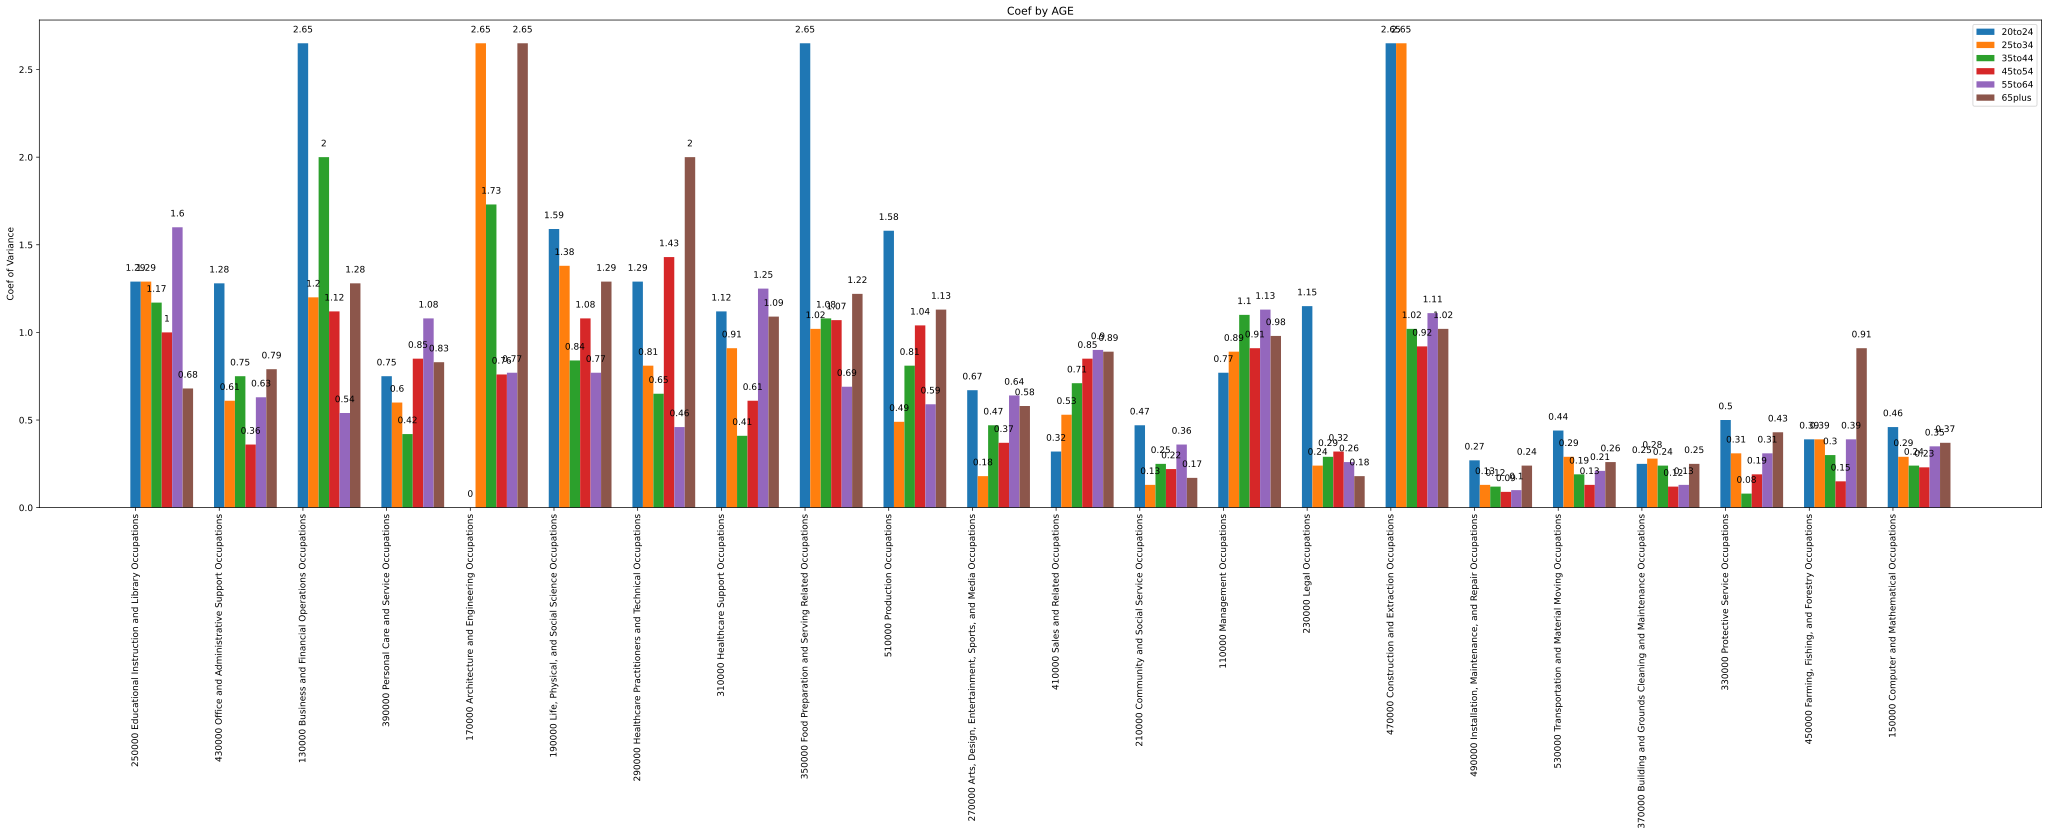

In [29]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
        
#print(labels)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)


title = "Coef by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [30]:
cases = ["20to24", "25to34", "35to44", "45to54", "55to64", "65plus"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    #for i in range(0,len(code_list)):
    #for i in swivel_order:
    for i in sorted_order:
    
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0000000 	 20to24 250000 Educational Instruction and Library Occupations 
0.0000000 	 20to24 430000 Office and Administrative Support Occupations 
0.0000000 	 20to24 130000 Business and Financial Operations Occupations 
0.0000000 	 20to24 390000 Personal Care and Service Occupations 
0.0000000 	 20to24 390000 Personal Care and Service Occupations 
0.0000000 	 20to24 170000 Architecture and Engineering Occupations 
0.0000000 	 20to24 190000 Life, Physical, and Social Science Occupations 
0.0000000 	 20to24 290000 Healthcare Practitioners and Technical Occupations 
0.0000000 	 20to24 310000 Healthcare Support Occupations 
0.0000000 	 20to24 350000 Food Preparation and Serving Related Occupations 
0.0000000 	 20to24 510000 Production Occupations 
0.0000001 	 20to24 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000001 	 20to24 410000 Sales and Related Occupations 
0.0000002 	 20to24 210000 Community and Social Service Occupations 
0.0000001 	 20to24 110000 Manageme

In [31]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
              
for i in range(0,len(labels)):
    print(labels[i])

 250000 Educational Instruction and Library Occupations
 430000 Office and Administrative Support Occupations
 130000 Business and Financial Operations Occupations
 390000 Personal Care and Service Occupations
 170000 Architecture and Engineering Occupations
 190000 Life, Physical, and Social Science Occupations
 290000 Healthcare Practitioners and Technical Occupations
 310000 Healthcare Support Occupations
 350000 Food Preparation and Serving Related Occupations
 510000 Production Occupations
 270000 Arts, Design, Entertainment, Sports, and Media Occupations
 410000 Sales and Related Occupations
 210000 Community and Social Service Occupations
 110000 Management Occupations
 230000 Legal Occupations
 470000 Construction and Extraction Occupations
 490000 Installation, Maintenance, and Repair Occupations
 530000 Transportation and Material Moving Occupations
 370000 Building and Grounds Cleaning and Maintenance Occupations
 330000 Protective Service Occupations
 450000 Farming, Fishin

6
22
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_Mean_Injury_per_1000000_by_AGE.png


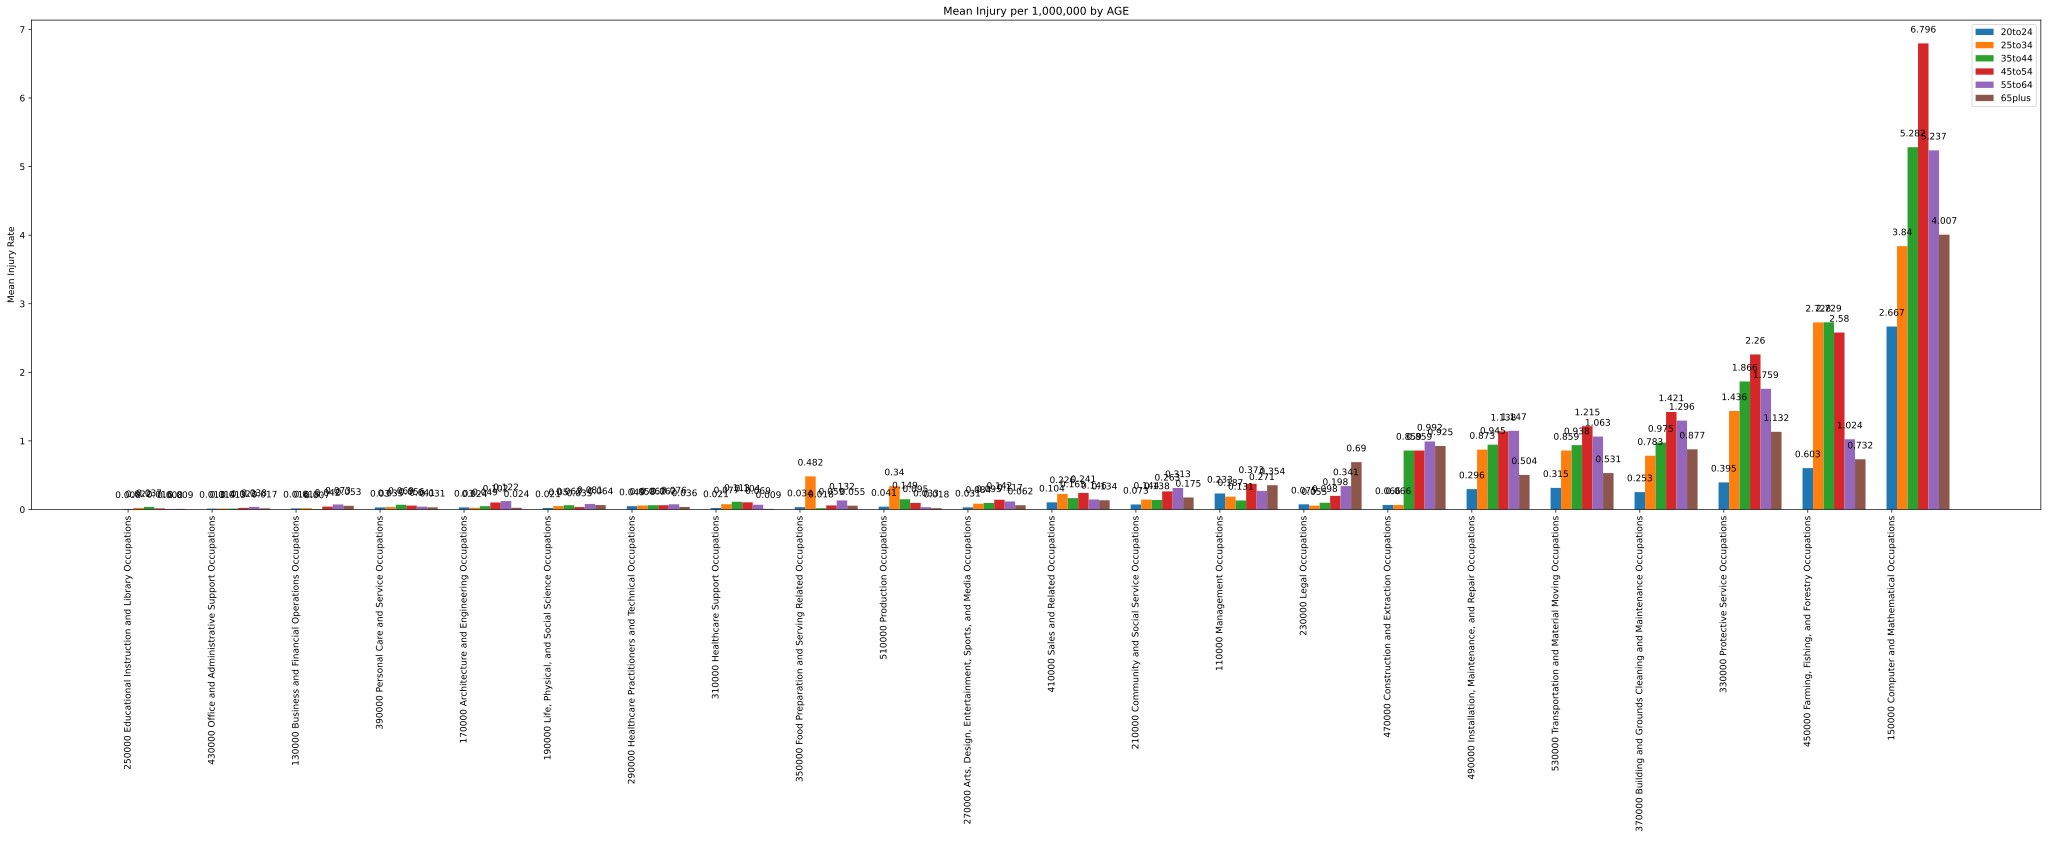

In [32]:
           
groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(1000000*val,3)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

print(len(grpd))
print(len(grpd[0]))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)

    
title = "Mean Injury per 1,000,000 by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()

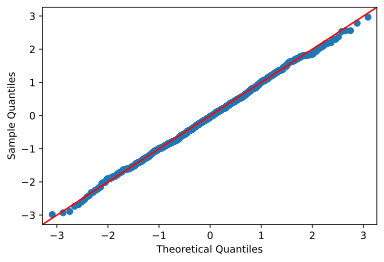

In [33]:
# Sample QQ plot

import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
pylab.show()


In [34]:
# Restructure data for QQ analysis

[0.08, 0.13, 0.16, 0.3, 0.3, 0.21, 0.49, 0.21, 0.34, 0.41, 0.31, 1.04, 0.73, 2.33, 0.75, 0.66, 2.96, 3.15, 2.53, 3.95, 6.03, 26.67]
[0.22, 0.14, 0.18, 0.35, 0.24, 0.5, 0.58, 0.77, 4.82, 3.4, 0.84, 2.26, 1.44, 1.87, 0.55, 0.66, 8.73, 8.59, 7.83, 14.36, 27.28, 38.4]
[0.37, 0.13, 0.07, 0.69, 0.49, 0.62, 0.62, 1.13, 0.18, 1.49, 0.95, 1.65, 1.38, 1.31, 0.98, 8.59, 9.45, 9.38, 9.75, 18.66, 27.29, 52.82]
[0.16, 0.23, 0.42, 0.56, 1.02, 0.35, 0.62, 1.04, 0.59, 0.95, 1.42, 2.41, 2.63, 3.73, 1.98, 8.59, 11.38, 12.15, 14.21, 22.6, 25.8, 67.96]
[0.08, 0.38, 0.73, 0.41, 1.22, 0.81, 0.76, 0.69, 1.32, 0.33, 1.17, 1.46, 3.13, 2.71, 3.41, 9.92, 11.47, 10.63, 12.96, 17.59, 10.24, 52.37]
[0.09, 0.17, 0.53, 0.31, 0.24, 0.64, 0.36, 0.09, 0.55, 0.18, 0.62, 1.34, 1.75, 3.54, 6.9, 9.25, 5.04, 5.31, 8.77, 11.32, 7.32, 40.07]
22
0  250000 Educational Instruction and Library Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_250000.png


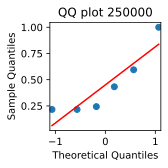

1  430000 Office and Administrative Support Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_430000.png


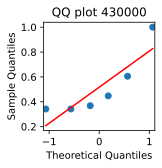

2  130000 Business and Financial Operations Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_130000.png


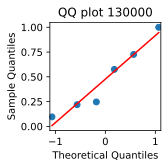

3  390000 Personal Care and Service Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_390000.png


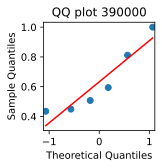

4  170000 Architecture and Engineering Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_170000.png


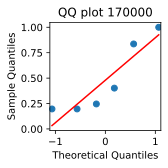

5  190000 Life, Physical, and Social Science Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_190000.png


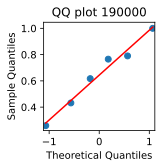

6  290000 Healthcare Practitioners and Technical Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_290000.png


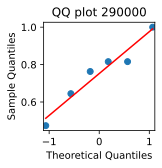

7  310000 Healthcare Support Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_310000.png


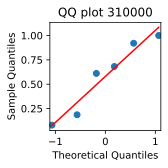

8  350000 Food Preparation and Serving Related Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_350000.png


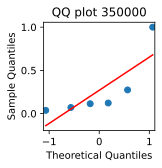

9  510000 Production Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_510000.png


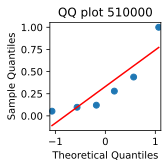

10  270000 Arts, Design, Entertainment, Sports, and Media Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_270000.png


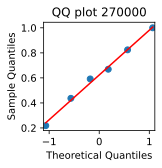

11  410000 Sales and Related Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_410000.png


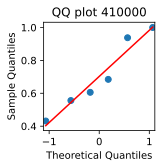

12  210000 Community and Social Service Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_210000.png


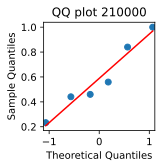

13  110000 Management Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_110000.png


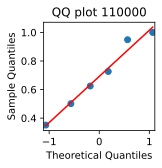

14  230000 Legal Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_230000.png


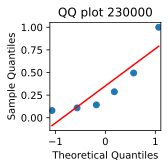

15  470000 Construction and Extraction Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_470000.png


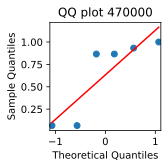

16  490000 Installation, Maintenance, and Repair Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_490000.png


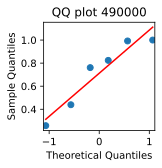

17  530000 Transportation and Material Moving Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_530000.png


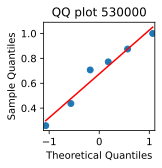

18  370000 Building and Grounds Cleaning and Maintenance Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_370000.png


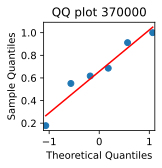

19  330000 Protective Service Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_330000.png


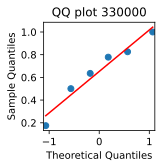

20  450000 Farming, Fishing, and Forestry Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_450000.png


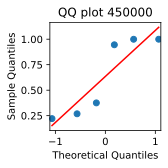

21  150000 Computer and Mathematical Occupations
../PLOTS/./F_SUBAVG_AGE/F_AGE_2018_QQ_plot_150000.png


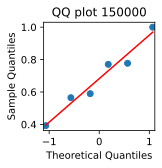

In [35]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000000*val,2)
        
        subgrp.append(val)

    print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
# Restructure
qq_data = []

print(len(grpd[1]))

for i in range(0,len(grpd[0])):
    tmp_list = []
    for j in range(0,len(grpd)):
        #print(grpd[j][i]," ",end="")
        tmp_list.append(grpd[j][i])
    #print(tmp_list)
    tmax = np.array(tmp_list).max()
    tscale = np.array(tmp_list) / tmax
    qq_data = qq_data + tscale.tolist()
    #print(tscale)
    
    #my_data = norm.rvs(size=22)
    my_data = tscale
    #print(my_data)
    fig, ax = plt.subplots(figsize=(2, 2))
    sm.qqplot(my_data, line='r', ax=ax)
    
    print(i,labels[i])
    
    title = "QQ plot "+str(labels[i]).split(" ")[1]
    ax.set_title(title)

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    #pylab.show()
    plt.show()
    #plt.close()

In [36]:
print(labels)    
print(len(labels))    
for i in range(0,len(labels)):
    print(labels[i])

[' 250000 Educational Instruction and Library Occupations', ' 430000 Office and Administrative Support Occupations', ' 130000 Business and Financial Operations Occupations', ' 390000 Personal Care and Service Occupations', ' 170000 Architecture and Engineering Occupations', ' 190000 Life, Physical, and Social Science Occupations', ' 290000 Healthcare Practitioners and Technical Occupations', ' 310000 Healthcare Support Occupations', ' 350000 Food Preparation and Serving Related Occupations', ' 510000 Production Occupations', ' 270000 Arts, Design, Entertainment, Sports, and Media Occupations', ' 410000 Sales and Related Occupations', ' 210000 Community and Social Service Occupations', ' 110000 Management Occupations', ' 230000 Legal Occupations', ' 470000 Construction and Extraction Occupations', ' 490000 Installation, Maintenance, and Repair Occupations', ' 530000 Transportation and Material Moving Occupations', ' 370000 Building and Grounds Cleaning and Maintenance Occupations', ' 33